In [ ]:
#https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
#https://www.kaggle.com/pokhang123/brain-tumor-detection-cnn-86
#https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
#https://towardsdatascience.com/end-to-end-pipeline-for-setting-up-multiclass-image-classification-for-data-scientists-2e051081d41c
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from PIL import Image
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras import backend as K

import cv2
import shutil
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


In [ ]:
data = '/content/drive/MyDrive/GANs/'
No_brain_tumor = '/content/drive/MyDrive/GANs/No'
Yes_brain_tumor = '/content/drive/MyDrive/GANs/Yes'

In [ ]:
dirlist=[No_brain_tumor, Yes_brain_tumor]
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  253    labels:  253


In [ ]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(253,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,/content/drive/MyDrive/GANs/No/11 no.jpg,No
1,/content/drive/MyDrive/GANs/No/10 no.jpg,No
2,/content/drive/MyDrive/GANs/No/14 no.jpg,No
3,/content/drive/MyDrive/GANs/No/15 no.jpg,No
4,/content/drive/MyDrive/GANs/No/1 no.jpeg,No


In [ ]:
print(df['labels'].value_counts())

Yes    155
No      98
Name: labels, dtype: int64


In [ ]:
df = shuffle(df)

In [ ]:
df.head()

,filepaths,labels
105,/content/drive/MyDrive/GANs/Yes/Y31.jpg,1
224,/content/drive/MyDrive/GANs/Yes/Y256.JPG,1
179,/content/drive/MyDrive/GANs/Yes/Y169.jpg,1
57,/content/drive/MyDrive/GANs/No/No19.jpg,0
15,/content/drive/MyDrive/GANs/No/26 no.jpg,0


In [ ]:
images = []
for filename in df['filepaths']:
  img=Image.open(filename)
  img = img.resize((128,128))
  img = np.array(img)
  img = (img.astype(np.float32) - 127.5)/127.5
  if len(img.shape) > 2 and img.shape[2] == 4:
      img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
  if len(img.shape) > 2 and img.shape[2] == 3:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  images.append(img)

images = np.array(images)

In [ ]:
images.shape

(253, 128, 128)

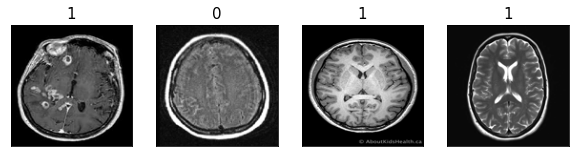

In [ ]:
plt.figure(figsize=(10,8))
for i in range(4):
    random = np.random.randint(1,len(df))
    plt.subplot(1,4,i+1)
    plt.imshow(images[random], cmap='gray')
    plt.title(df.loc[random, "labels"], size = 15, color = "black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, df['labels'], test_size=0.4)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

print(f"X_train set shape: {X_train.shape} y_train set shape: {y_train.shape}")
print(f"X_valid set shape: {X_valid.shape} y_valid set shape: {y_valid.shape}")
print(f"X_test set shape: {X_test.shape} y_test set shape: {y_test.shape}")

X_train set shape: (151, 128, 128) y_train set shape: (151,)
X_valid set shape: (51, 128, 128) y_valid set shape: (51,)
X_test set shape: (51, 128, 128) y_test set shape: (51,)


In [ ]:
epochs = 10
batch_size = 10
input_shape = (128,128,1)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(128,128,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)      

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape(-1, 128, 128, 1)
X_valid = X_valid.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/10
16/16 [==============================] - 4s 233ms/step - loss: 0.6533 - accuracy: 0.6490 - val_loss: 0.6933 - val_accuracy: 0.5686
Epoch 2/10
16/16 [==============================] - 3s 217ms/step - loss: 0.5631 - accuracy: 0.7285 - val_loss: 0.6008 - val_accuracy: 0.6471
Epoch 3/10
16/16 [==============================] - 4s 227ms/step - loss: 0.4764 - accuracy: 0.8212 - val_loss: 0.7102 - val_accuracy: 0.7255
Epoch 4/10
16/16 [==============================] - 4s 222ms/step - loss: 0.4160 - accuracy: 0.8411 - val_loss: 0.6052 - val_accuracy: 0.8431
Epoch 5/10
16/16 [==============================] - 3s 213ms/step - loss: 0.3473 - accuracy: 0.8675 - val_loss: 0.5575 - val_accuracy: 0.8235
Epoch 6/10
16/16 [==============================] - 3s 212ms/step - loss: 0.2788 - accuracy: 0.8940 - val_loss: 0.5825 - val_accuracy: 0.8431
Epoch 7/10
16/16 [==============================] - 3s 215ms/step - loss: 0.2245 - accuracy: 0.9073 - val_loss: 0.4382 - val_accuracy: 0.8627
Epoch 

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


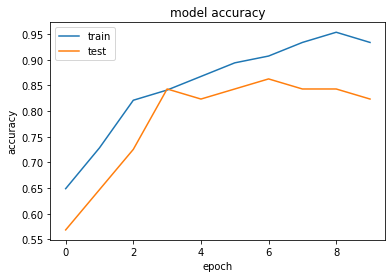

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

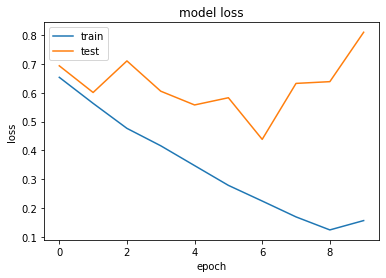

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

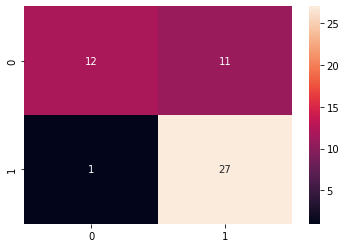

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7647058823529411



---



---

